In [1]:
# Step 1: Import all essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/content/Mumbai House Prices.csv.zip")
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (76038, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [6]:
df.isnull().sum()

,0
bhk,0
type,0
locality,0
area,0
price,0
price_unit,0
region,0
status,0
age,0


In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:{df[col].nunique()} unique values")

type:5 unique values
locality:9782 unique values
price_unit:2 unique values
region:228 unique values
status:2 unique values
age:3 unique values


In [8]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:{df[col].unique()} unique values")

type:['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse'] unique values
locality:['Lak And Hanware The Residency Tower' 'Radheya Sai Enclave Building No 2'
 'Romell Serene' ... 'Ahuja Prasadam Phase III' 'HBS Marineview'
 'Hubtown Serene'] unique values
price_unit:['Cr' 'L'] unique values
region:['Andheri West' 'Naigaon East' 'Borivali West' 'Panvel' 'Mira Road East'
 'Parel' 'Boisar' 'Santacruz East' 'Badlapur East' 'Fort' 'Badlapur West'
 'Khopoli' 'Chembur' 'Jogeshwari West' 'Vasai' 'Kalamboli' 'Powai'
 'Ghansoli' 'Thane West' 'Vikhroli' 'Bhiwandi' 'Airoli' 'Ambernath West'
 'Borivali East' 'Virar' 'Kharghar' 'Ulwe' 'Kamothe' 'Jogeshwari East'
 'Mulund West' 'Palghar' 'Goregaon West' 'Taloja' 'Rasayani'
 'Ghatkopar East' 'Ulhasnagar' 'Dombivali' 'Kewale' 'Nala Sopara'
 'Goregaon East' 'Kandivali East' 'Kurla' 'Andheri East' 'Dahisar'
 'Karanjade' 'Mahim' 'Vashi' 'Malad West' 'Girgaon' 'Dadar West'
 'Bandra West' 'Kandivali West' 'Kalyan West' 'Neral' 'Kalyan East

In [9]:
def convert_price(row):
    if row['price_unit'] == 'Cr':
        return row['price'] * 10000000
    elif row['price_unit'] == 'L':
        return row['price'] * 100000
    else:
        return None
df['price_in_rupees'] = df.apply(convert_price, axis=1)
df.drop(columns=['price', 'price_unit'], inplace=True)

In [10]:
df2 = df.copy()
df2.drop(columns=['locality'], inplace=True)
df2.head()

,bhk,type,area,region,status,age,price_in_rupees
0,3,Apartment,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,659,Mira Road East,Under Construction,New,9411000.0


In [11]:
for col in df2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])

df2.head()

,bhk,type,area,region,status,age,price_in_rupees
0,3,0,685,8,0,0,25000000.0
1,2,0,640,124,1,0,5251000.0
2,2,0,610,31,1,0,17300000.0
3,2,0,876,140,1,0,5998000.0
4,2,0,659,117,1,0,9411000.0


In [12]:
X = df2.drop(columns=['price_in_rupees'])
y = df2['price_in_rupees']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"MAE (in Rupees): ₹{mae:,.0f}")
print(f"RMSE (in Rupees): ₹{rmse:,.0f}")

R² Score: 0.8893
MAE (in Rupees): ₹2,845,594
RMSE (in Rupees): ₹7,113,712


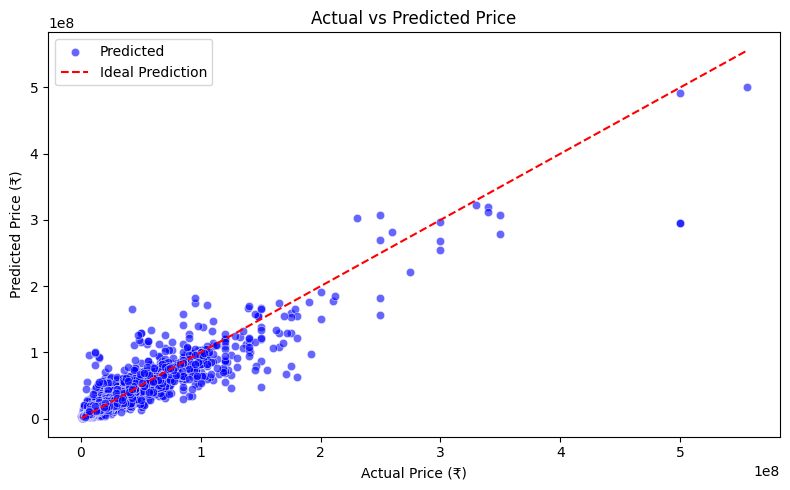

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')

plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.show()